# Bike Sharing : Multiple Linear Regression Assignment

## <div style="text-align: right"> By Sudhanshu Sharma </div>

# Problem Statement

## Introduction

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



## Business Goals

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Section - 1  Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



import warnings
warnings.filterwarnings('ignore')

# Section - 2 Reading and Data Cleaning

### Section - 2.1 Reading and Understanding the data 

In [2]:
#reading the data set and checking the head.

df_day = pd.read_csv('day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the number of rows and columns in a dataframe

df_day.shape

(730, 16)

In [4]:
# checking the column names

df_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
# Inspecting the dataframe

df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# checking the summary of numerical columns 

df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# checking if there are any null value present in a data frame

df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# checking the datatypes of all the columns 

df_day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
# definig a function in order to change the name of columns for better reading and understanding

def fun(var,vary,van):
    for i in var:
        if i == van:
            var.rename(columns= {i:vary},inplace = True)
    return var

In [10]:
# Renaming the column 'yr' to 'year'

fun(df_day,'year','yr')

,instant,dteday,season,year,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [11]:
df_day.head()

,instant,dteday,season,year,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# Renaming the column 'mnth' to 'month'

fun(df_day,'month','mnth')

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [13]:
# Renaming the column 'hum' to 'humidity'

fun(df_day,'humidity','hum')
df_day.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Section - 2.2 Visualising the data for better understanding


### Visualising Numerical Variables

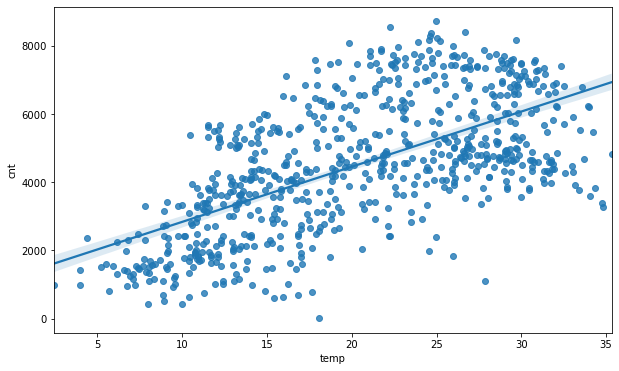

In [14]:
# Plotting the scatter plot between 'cnt' and 'temp'

plt.figure(figsize=[10,6])
sns.regplot(x = 'temp', y = 'cnt', data = df_day)
plt.show()

Inference-
    Here, we can clearly see that there is a positive correlation between 'temp' and 'cnt'

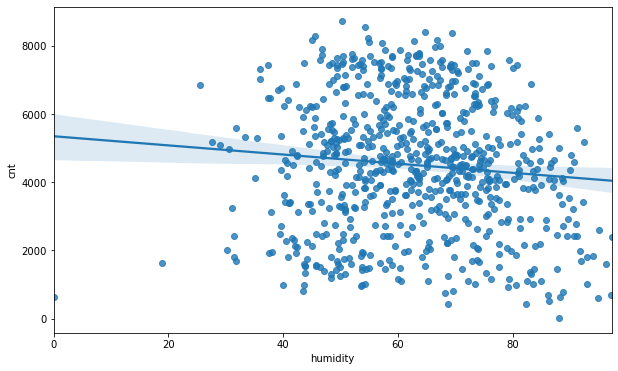

In [15]:
# plotting the scatterplot between 'cnt' and 'humiditity'

plt.figure(figsize=[10,6])
sns.regplot(x = 'humidity', y = 'cnt', data = df_day)
plt.show()

Infernce - 
    Here, we can see that there is a negative correlation between 'humidity' and 'cnt'. 

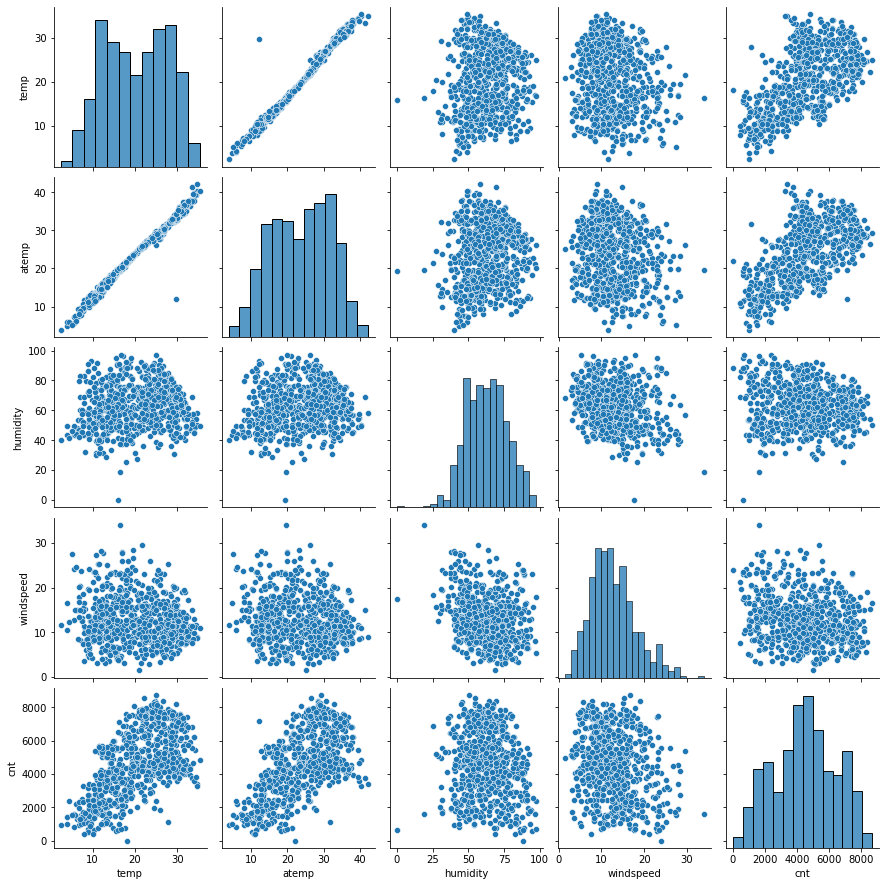

In [16]:
# plotting the pairplot between all numerical varibales and seeing their correlation with our target variable..

sns.pairplot(df_day[['temp','atemp','humidity','windspeed','cnt']])
plt.show()

Inference 
1. We can see that there is some sort of linear regression between 'temp' and 'cnt'.
2. There is another linear relation between 'atemp' and 'cnt'
3. As we can see, there is a very high correlation between 'temp' and 'atemp', we can drop any of the variable.
However, we will see other variables later by analysing other factors too.

### Visualising Categorical Variable

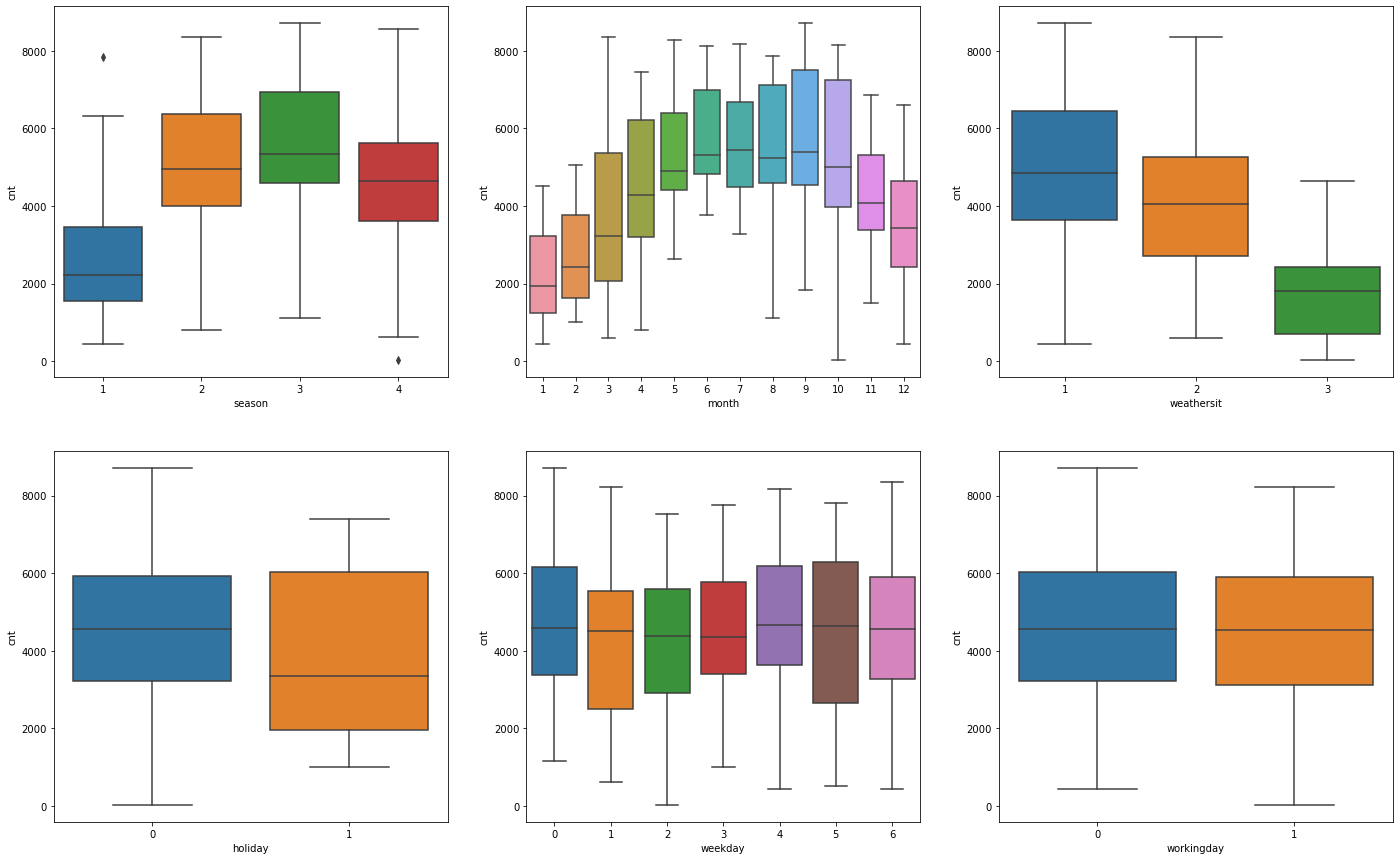

In [17]:
# Now, plotting the graph between the categorical variables 

plt.figure(figsize =[24,15])
plt.subplot(2,3,1)
sns.boxplot(y = 'cnt', x = 'season', data = df_day)
plt.subplot(2,3,2)
sns.boxplot(y = 'cnt', x = 'month', data = df_day)
plt.subplot(2,3,3)
sns.boxplot(y = 'cnt', x = 'weathersit', data = df_day)
plt.subplot(2,3,4)
sns.boxplot(y = 'cnt', x = 'holiday', data = df_day)
plt.subplot(2,3,5)
sns.boxplot(y = 'cnt', x = 'weekday', data = df_day)
plt.subplot(2,3,6)
sns.boxplot(y = 'cnt', x = 'workingday', data = df_day)
plt.show()

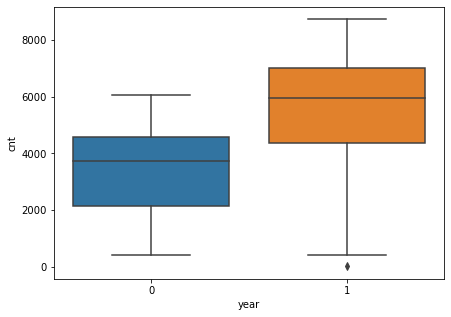

In [18]:
plt.figure(figsize=[7,5])
sns.boxplot(y = 'cnt', x = 'year', data = df_day)
plt.show()

Inference 
1. We can see that most of the columns don't have any naming.
2. It is clear that the bike rentals (cnt) were minimum in spring season whereas it is maximum in fall season.
3. After looking at the boxplot, it is clear that the bike rentals were reduced on holidays.
4. From the starting of the weekday i.e. on Monday, the bike rentals were least but it was increasing as the day proceeds and were maximum during the weekends i.e. on Sunday.
5. September saw the maximum bike rentals whereas January had the minimum rentals. There is a visible pattern in the graph is that rentals were high in between June and September.
7. No one had rented bikes in heavy rain which shows that weather has huge impact on bike rentals. Rentals were maximum when the weather is clear or partly clouded but rentals decreased as the weather conditions getting bad.
8. The number of rentals in 2019 were more than 2018.

### Section - 2.3 Data Cleaning

 Removing those columns that are irrelavant

In [19]:
# Dropping dteday column as we already have month, weekday and year seperately

df_day = df_day.drop('dteday', axis = 1)

In [20]:
# Dropping 'casual' and 'registered' columns as it has no significant role and 'cnt' = 'casual' + 'registered' already

df_day = df_day.drop(['casual', 'registered'], axis =1)

In [21]:
# dropping 'instant' column as it has no use

df_day = df_day.drop('instant',axis =1)

In [22]:
df_day.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Handling Outliers

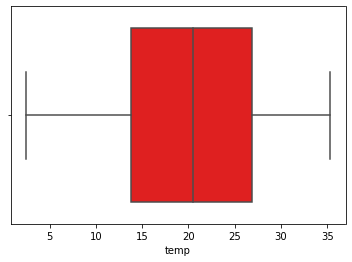

In [23]:
# checking outliers in 'temp' column

sns.boxplot(df_day.temp, color= 'red')
plt.show()

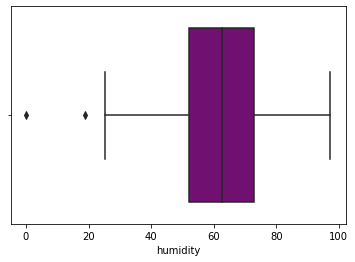

In [24]:
# Checking outliers in 'Humidity' column

sns.boxplot(df_day.humidity, color= 'purple')
plt.show()

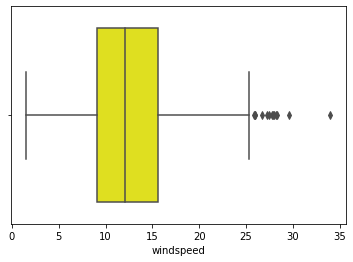

In [25]:
# Checking outliers in 'windspeed' column

sns.boxplot(df_day.windspeed, color= 'yellow')
plt.show()

No need to drop any outlier because the values are continuous and acceptable

# Section - 3  Data Preparation

###  Section - 3.1 Mapping the variables

We can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them. So, it is advisable to convert such feature values into categorical string values before proceeding with model building.

In [26]:
# Mapping the 'season' variable

df_day['season'] = df_day.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [27]:
# checking the value counts in season column

df_day.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

df_day['month'].value_counts()

In [28]:
# Mapping the 'month' variable

df_day['month'] = df_day['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [29]:
df_day['month'].value_counts()

Aug    62
Jul    62
May    62
Jan    62
Dec    62
Mar    62
Oct    62
Sep    60
Nov    60
Jun    60
Apr    60
Feb    56
Name: month, dtype: int64

In [30]:
# Mapping the 'weekday' variable

df_day['weekday'] = df_day['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

In [31]:
# checking the value counts in weekday column

df_day['weekday'].value_counts()

Monday       105
Tuesday      105
Thursday     104
Wednesday    104
Sunday       104
Saturday     104
Friday       104
Name: weekday, dtype: int64

In [32]:
# Mapping the 'weathersit' varible

df_day.weathersit = df_day.weathersit.map({1:'Clear',2:'Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [33]:
# checking the value counts in weather column

df_day.weathersit.value_counts()

Clear                463
Cloudy               246
Light Snow & Rain     21
Name: weathersit, dtype: int64

###  Section - 3.2 Creating Dummy Variables 

In [34]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'season'

dummy1 = pd.get_dummies(df_day['season'],drop_first= True)

In [35]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'month'

dummy2 = pd.get_dummies(df_day['month'],drop_first= True)

In [36]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'weekday'

dummy3 = pd.get_dummies(df_day['weekday'], drop_first= True)

In [37]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'weathersit'

dummy4 = pd.get_dummies(df_day['weathersit'], drop_first= True)

In [38]:
# Add the results to the original df_day dataframe and storing them in new datafame

df = pd.concat([df_day,dummy1,dummy2,dummy3,dummy4], axis = 1)

In [39]:
# Checking what the dataframe 'df' looks like

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow & Rain
0,spring,0,Jan,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,1,0
1,spring,0,Jan,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,1,0
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Dropping these varibles as we have created the dummies for it

df = df.drop(['season','month','weekday','weathersit'], axis =1 )

In [41]:
# Checking the head of our new data frame

df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow & Rain
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


# Section - 4 Model Building 

### Section 4.1 Splitting data into training and testing sets

As we know, first step of performing the linear regression is train test split.

In [42]:
# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [43]:
# Checking the shape of train-test dataset

print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Section - 4.2 Rescalling the features



It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:
1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [44]:
# Creating a scaler

scaler = MinMaxScaler()

In [45]:
# Creating a list of variables that we need to rescale

varlist = ['temp','atemp', 'humidity','windspeed', 'cnt']

In [46]:
 # Apply scaler() to all the columns except the dummy' variables

df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [47]:
# Checking how our dataframe looks like after rescalling

df_train[varlist].head()

,temp,atemp,humidity,windspeed,cnt
653,0.509887,0.501133,0.575354,0.300794,0.864243
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973


In [48]:
# Checking the summary of our training dataset after rescalling

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow & Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# Checking the correlation in the training set to see which variables are highly correlated

corr = df_train.corr()
corr

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow & Rain
year,1.000000,-0.014980,-0.003005,0.107288,0.104206,-0.084792,-0.001108,0.591508,-0.036320,0.013856,...,-0.018790,0.002574,-0.033817,-0.017733,0.016537,0.032785,0.026024,0.010995,-0.015469,-6.076399e-02
holiday,-0.014980,1.000000,-0.254149,-0.066282,-0.070640,-0.029093,0.017569,-0.095961,0.053339,-0.063232,...,-0.005387,0.043692,-0.069242,-0.025291,-0.028355,-0.066102,0.034971,0.190636,-0.038279,-2.815377e-02
workingday,-0.003005,-0.254149,1.000000,-0.007643,0.003814,0.020701,-0.002504,-0.008723,-0.032886,0.030488,...,0.025939,-0.034746,0.272446,-0.605864,-0.626783,0.260091,0.234321,0.163120,-0.068924,8.289412e-03
temp,0.107288,-0.066282,-0.007643,1.000000,0.989537,0.155415,-0.187396,0.643517,-0.605988,0.125582,...,-0.018709,0.207457,-0.037708,0.025276,0.006854,0.074973,-0.001951,-0.046291,-0.090161,-3.609266e-02
atemp,0.104206,-0.070640,0.003814,0.989537,1.000000,0.169461,-0.215283,0.646475,-0.610741,0.135806,...,-0.005262,0.206157,-0.036829,0.012090,0.006359,0.078627,0.002815,-0.043377,-0.086069,-4.426553e-02
humidity,-0.084792,-0.029093,0.020701,0.155415,0.169461,1.000000,-0.266895,-0.059993,-0.201134,-0.013216,...,0.162014,0.152628,-0.030499,0.002783,-0.027388,-0.056997,0.033548,0.026395,0.481042,2.450381e-01
windspeed,-0.001108,0.017569,-0.002504,-0.187396,-0.215283,-0.266895,1.000000,-0.253794,0.180743,0.110089,...,-0.018973,-0.121734,0.035390,-0.016284,0.018278,-0.021502,0.035616,-0.057518,-0.030385,8.689990e-02
cnt,0.591508,-0.095961,-0.008723,0.643517,0.646475,-0.059993,-0.253794,1.000000,-0.548871,0.134343,...,0.065692,0.201327,-0.071188,0.012496,0.031237,0.110430,-0.018885,-0.019578,-0.175530,-2.265984e-01
spring,-0.036320,0.053339,-0.032886,-0.605988,-0.610741,-0.201134,0.180743,-0.548871,1.000000,-0.322955,...,-0.174161,-0.167580,0.010007,-0.000641,0.013022,-0.048931,-0.012251,0.002987,0.013970,-4.455809e-02
summer,0.013856,-0.063232,0.030488,0.125582,0.135806,-0.013216,0.110089,0.134343,-0.322955,1.000000,...,-0.175089,-0.168473,-0.017169,-0.002397,-0.015325,0.066484,-0.001490,-0.012151,0.039442,-4.523062e-02


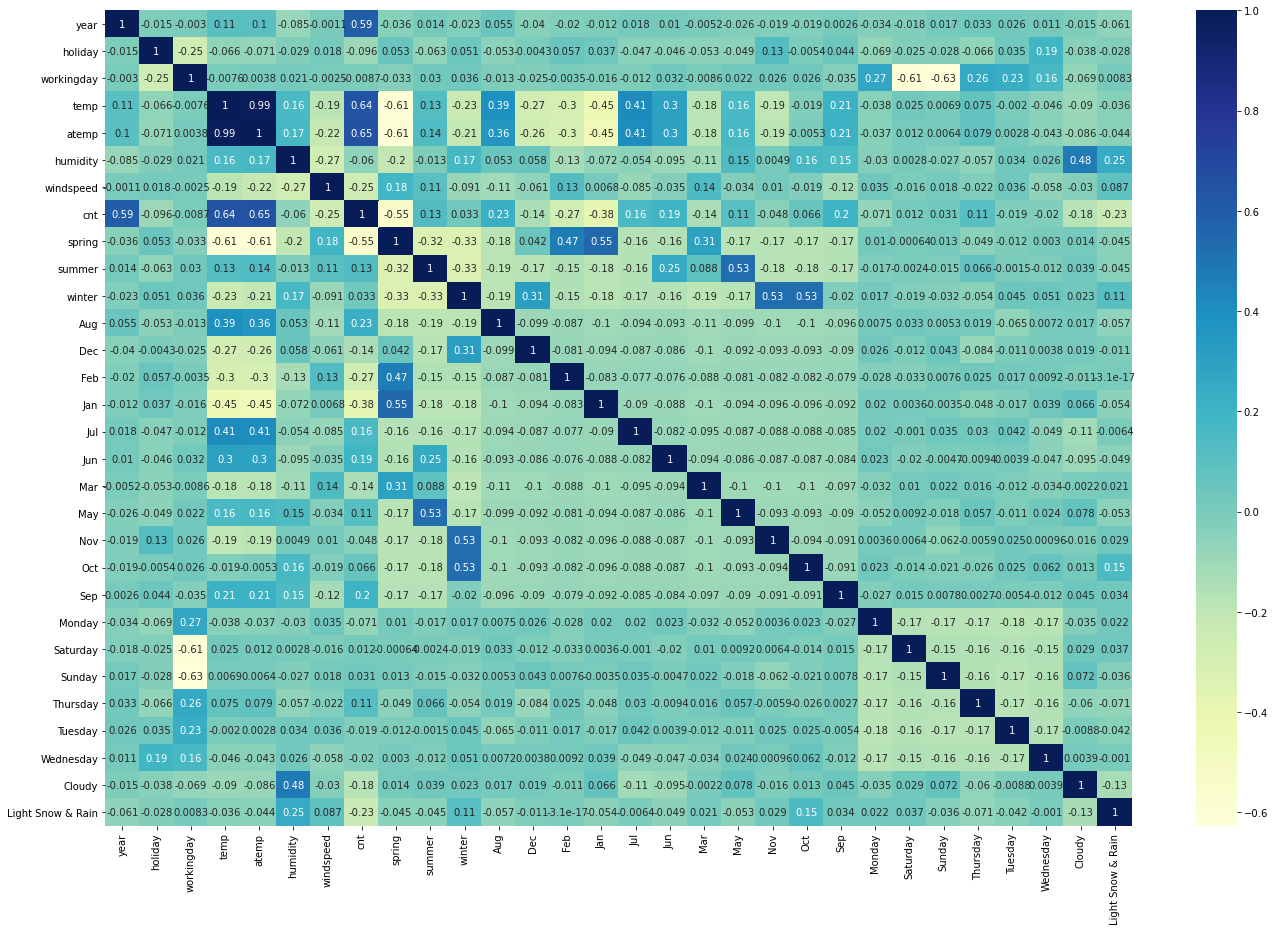

In [50]:
# Plotting the heatmap for better understanding

plt.figure(figsize= [23,15])
sns.heatmap(corr,annot= True, cmap= 'YlGnBu')
plt.show()

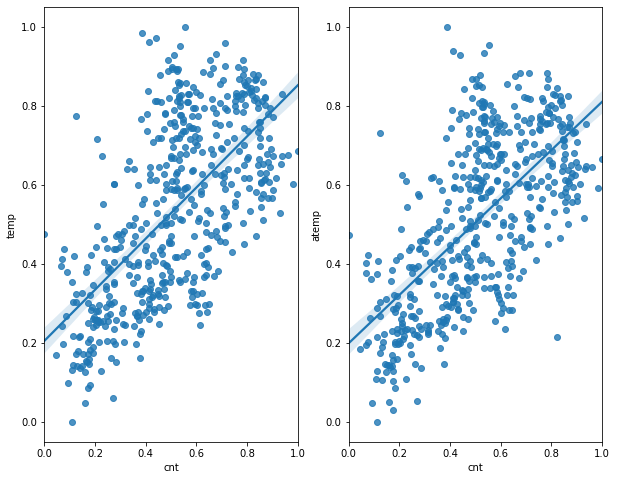

In [51]:
# Plotting the scatterplot side by side for comparison

plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
sns.regplot(df_train.cnt, df_train.temp)

plt.subplot(1,2,2)
sns.regplot(df_train.cnt, df_train.atemp)
plt.show()

plt.show()

They are looking almost exactly similar. It means they are highly correlated. So, we can drop any one of them.

### Section - 4.3  Divinding Training set into X_train and y_train for model building

In [52]:
# diving the training set into X and y

y_train = df_train.pop('cnt')
X_train = df_train

###  Section- 4.4 Using RFE method for Variable Selection

In [53]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [54]:
# Checking the importance rank of these variables

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11),
 ('Cloudy', True, 1),
 ('Light Snow & Rain', True, 1)]

In [55]:
# storing the importing variables according to RFE method

col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Cloudy',
       'Light Snow & Rain'],
      dtype='object')

In [56]:
# checking the column names that are important according to RFE

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [57]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [58]:
# Checking the head of New dataframe

X_train_rfe.head()

,year,holiday,temp,humidity,windspeed,spring,summer,winter,Dec,Jan,Jul,Nov,Sep,Cloudy,Light Snow & Rain
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0


### Section - 4.5 Building model using statsmodels for detailed statistics

### Model -1 

In [59]:
# Adding constant to the dataframe and runnung the the model and checking the detailed summary of the model

X_train_rfe1 = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_rfe1).fit()  
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          3.34e-189
Time:                        16:13:11   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3202      0.036      8.886      0.000       0.249       0.391
year                  0.2303      0.008     28.511      0.000       0.214       0.246
holiday              -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                  0.4800      0.037     12.977      0.000       0.407       0.553
humidity             -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed            -0.1885      0.026     -7.312      0.000      -0.239      -0.138
spring               -0.0617      0.021     -2.907      0.004      -0.103      -0.020
summer                0.0408      0.015      2.659      0.008       0.011       0.071
winter                0.1034      0.018      5.763      0.000       0.068       0.139
Dec                  -0.0372      0.017     -2.131      0.034      -0.071      -0.003
Jan                  -0.0437      0.018     -2.415      0.016      -0.079      -0.008
Jul                  -0.0555      0.018     -3.046      0.002      -0.091      -0.020
Nov                  -0.0409      0.019     -2.187      0.029      -0.078      -0.004
Sep                   0.0749      0.017      4.438      0.000       0.042       0.108
Cloudy               -0.0559      0.010     -5.338      0.000      -0.076      -0.035
Light Snow & Rain    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, we can see that none of the p-values are greater than the 0.05. So we need to check the multicollinearity by looking at the VIF values

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [60]:
# Checking the VIF of model-1

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif

,Features,VIF
0,year,2.088118
1,holiday,1.059432
2,temp,17.795518
3,humidity,30.939617
4,windspeed,4.719884
5,spring,4.369102
6,summer,2.805602
7,winter,4.058890
8,Dec,1.550111
9,Jan,1.745893


<b>Inference</b> -
 Here we can see that 'humidity' has a very high VIF value. SO we need to drop as it is high multicollinear with other variables.

In [61]:
# dropping 'humidity' as it has a very high VIF value

X = X_train_rfe.drop('humidity', axis = 1)

### Model - 2

#### Building a model again after removing the 'humidity'

In [62]:
# Adding constant to the dataframe and runnung the the model and checking the detailed summary of the model

X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_lm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          1.57e-186
Time:                        16:13:11   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2466      0.032      7.679      0.000       0.184       0.310
year                  0.2343      0.008     28.709      0.000       0.218       0.250
holiday              -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                  0.4377      0.036     12.083      0.000       0.366       0.509
windspeed            -0.1586      0.025     -6.290      0.000      -0.208      -0.109
spring               -0.0716      0.021     -3.337      0.001      -0.114      -0.029
summer                0.0333      0.015      2.148      0.032       0.003       0.064
winter                0.0887      0.018      4.951      0.000       0.053       0.124
Dec                  -0.0445      0.018     -2.520      0.012      -0.079      -0.010
Jan                  -0.0503      0.018     -2.738      0.006      -0.086      -0.014
Jul                  -0.0504      0.018     -2.725      0.007      -0.087      -0.014
Nov                  -0.0419      0.019     -2.198      0.028      -0.079      -0.004
Sep                   0.0682      0.017      3.992      0.000       0.035       0.102
Cloudy               -0.0814      0.009     -9.359      0.000      -0.099      -0.064
Light Snow & Rain    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, we can see that again none of the p-values are greater than the 0.05. So we need to check the multicollinearity by looking at the VIF values

In [63]:
# Checking the VIF of model-2

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

,Features,VIF
0,year,2.073683
1,holiday,1.059430
2,temp,5.168995
3,windspeed,4.665765
4,spring,2.888464
5,summer,2.228255
6,winter,2.935584
7,Dec,1.459154
8,Jan,1.656100
9,Jul,1.593614


<b> Here, we are not dropping 'temp' variable even after having a VIF value greater than 5 because as per the domain understanding 'temp' is a important factor for hiring bike. So, we are dropping 'windspeed'</b>

In [64]:
# let's drop the variable windspeed

X =X.drop('windspeed', axis = 1)

### Model - 3 

#### Building model after removing 'windspeed' column

In [65]:
# Adding constant to the dataframe and runnung the the model and checking the detailed summary of the model

X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_lm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     182.5
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          1.92e-179
Time:                        16:13:11   Log-Likelihood:                 486.00
No. Observations:                 510   AIC:                            -944.0
Df Residuals:                     496   BIC:                            -884.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1853      0.032      5.832      0.000       0.123       0.248
year                  0.2330      0.008     27.513      0.000       0.216       0.250
holiday              -0.0942      0.027     -3.489      0.001      -0.147      -0.041
temp                  0.4614      0.037     12.337      0.000       0.388       0.535
spring               -0.0834      0.022     -3.756      0.000      -0.127      -0.040
summer                0.0250      0.016      1.561      0.119      -0.006       0.057
winter                0.0920      0.019      4.949      0.000       0.055       0.128
Dec                  -0.0349      0.018     -1.910      0.057      -0.071       0.001
Jan                  -0.0336      0.019     -1.781      0.076      -0.071       0.003
Jul                  -0.0515      0.019     -2.683      0.008      -0.089      -0.014
Nov                  -0.0439      0.020     -2.220      0.027      -0.083      -0.005
Sep                   0.0734      0.018      4.145      0.000       0.039       0.108
Cloudy               -0.0800      0.009     -8.860      0.000      -0.098      -0.062
Light Snow & Rain    -0.3071      0.025    -12.079      0.000      -0.357      -0.257
==============================================================================
Omnibus:                       77.233   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.024
Skew:                          -0.742   Prob(JB):                     1.50e-46
Kurtosis:                       5.780   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> Here, we can see that 'summer' column is insignificant as it has a 0.119 p-value which is very high.</b>

In [66]:
# Checking the VIF of model-3

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

,Features,VIF
0,year,2.070656
1,holiday,1.059277
2,temp,4.303016
3,spring,2.120102
4,summer,1.932474
5,winter,2.792030
6,Dec,1.459041
7,Jan,1.650710
8,Jul,1.591497
9,Nov,1.780252


    Here, we can see that all VIF values are under 5 which is good.

So, we are dropping 'summer' variable as it has a very high p-value.

In [67]:
# Let's Drop the variable summer as it has p-value greater than 0.05

X =X.drop('summer', axis = 1)

### Model - 4
#### Building model after dropping 'summer' column

In [68]:
# Adding constant to the dataframe and runnung the the model and checking the detailed summary of the model

X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_lm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          4.48e-180
Time:                        16:13:11   Log-Likelihood:                 484.75
No. Observations:                 510   AIC:                            -943.5
Df Residuals:                     497   BIC:                            -888.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2190      0.023      9.374      0.000       0.173       0.265
year                  0.2334      0.008     27.535      0.000       0.217       0.250
holiday              -0.0937      0.027     -3.465      0.001      -0.147      -0.041
temp                  0.4343      0.033     13.089      0.000       0.369       0.499
spring               -0.1072      0.016     -6.624      0.000      -0.139      -0.075
winter                0.0740      0.015      5.068      0.000       0.045       0.103
Dec                  -0.0400      0.018     -2.222      0.027      -0.075      -0.005
Jan                  -0.0380      0.019     -2.035      0.042      -0.075      -0.001
Jul                  -0.0620      0.018     -3.450      0.001      -0.097      -0.027
Nov                  -0.0491      0.020     -2.518      0.012      -0.087      -0.011
Sep                   0.0623      0.016      3.836      0.000       0.030       0.094
Cloudy               -0.0798      0.009     -8.830      0.000      -0.098      -0.062
Light Snow & Rain    -0.3083      0.025    -12.114      0.000      -0.358      -0.258
==============================================================================
Omnibus:                       78.587   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.903
Skew:                          -0.741   Prob(JB):                     2.40e-49
Kurtosis:                       5.888   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inference- Here, we can see that none of the p-values are greater than 0.05. So, we are checking the VIF values.

In [69]:
# Checking the VIF of model-4

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

,Features,VIF
0,year,2.054863
1,holiday,1.059111
2,temp,3.036497
3,spring,1.931234
4,winter,2.512670
5,Dec,1.457149
6,Jan,1.645896
7,Jul,1.338625
8,Nov,1.779605
9,Sep,1.202961


None of the VIF values are greater than 5. So, we need to drop the variable on the basis of domain understanding.

So, we are dropping the 'Jan' column as it has highest p-value among all the columns which is 0.042.

In [70]:
# let's remove the variable 'Jan' and see 

X =X.drop('Jan', axis = 1)

### Model - 5

#### Building model after dropping 'Jan' column

In [71]:
# Adding constant to the dataframe and runnung the the model and checking the detailed summary of the model

X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_lm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.1
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          2.34e-180
Time:                        16:13:12   Log-Likelihood:                 482.63
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     498   BIC:                            -890.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2075      0.023      9.125      0.000       0.163       0.252
year                  0.2329      0.008     27.397      0.000       0.216       0.250
holiday              -0.0947      0.027     -3.489      0.001      -0.148      -0.041
temp                  0.4524      0.032     14.112      0.000       0.389       0.515
spring               -0.1151      0.016     -7.312      0.000      -0.146      -0.084
winter                0.0744      0.015      5.086      0.000       0.046       0.103
Dec                  -0.0320      0.018     -1.816      0.070      -0.067       0.003
Jul                  -0.0659      0.018     -3.670      0.000      -0.101      -0.031
Nov                  -0.0448      0.019     -2.303      0.022      -0.083      -0.007
Sep                   0.0616      0.016      3.780      0.000       0.030       0.094
Cloudy               -0.0807      0.009     -8.900      0.000      -0.098      -0.063
Light Snow & Rain    -0.3055      0.025    -11.983      0.000      -0.356      -0.255
==============================================================================
Omnibus:                       74.862   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.843
Skew:                          -0.708   Prob(JB):                     9.97e-47
Kurtosis:                       5.822   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, we can see that p-value of 'Dec' is greater than 0.05 which is 0.07.


In [72]:
# Checking the VIF of model-5

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

,Features,VIF
0,year,2.048086
1,holiday,1.058731
2,temp,2.990379
3,spring,1.294931
4,winter,2.491096
5,Dec,1.415866
6,Jul,1.334676
7,Nov,1.773091
8,Sep,1.202781
9,Cloudy,1.506851


All VIF values are less than 5. So, we are dropping 'Dec' column.

In [73]:
# let's remove the variable dec and see 

X =X.drop('Dec', axis = 1)

### Model - 6

#### Building model after dropping 'Dec' column

In [74]:
# Adding constant to the dataframe and runnung the the model and checking the detailed summary of the model

X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_lm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.0
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          7.68e-181
Time:                        16:13:12   Log-Likelihood:                 480.95
No. Observations:                 510   AIC:                            -939.9
Df Residuals:                     499   BIC:                            -893.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1990      0.022      8.922      0.000       0.155       0.243
year                  0.2331      0.009     27.364      0.000       0.216       0.250
holiday              -0.0952      0.027     -3.503      0.001      -0.149      -0.042
temp                  0.4642      0.031     14.755      0.000       0.402       0.526
spring               -0.1138      0.016     -7.218      0.000      -0.145      -0.083
winter                0.0651      0.014      4.740      0.000       0.038       0.092
Jul                  -0.0678      0.018     -3.777      0.000      -0.103      -0.033
Nov                  -0.0319      0.018     -1.758      0.079      -0.068       0.004
Sep                   0.0635      0.016      3.897      0.000       0.031       0.096
Cloudy               -0.0802      0.009     -8.834      0.000      -0.098      -0.062
Light Snow & Rain    -0.3020      0.025    -11.853      0.000      -0.352      -0.252
==============================================================================
Omnibus:                       70.276   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.677
Skew:                          -0.682   Prob(JB):                     1.07e-41
Kurtosis:                       5.649   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, we can see that the p-value of "Nov" is greater than 0.05.

In [75]:
# Checking the VIF of model-6

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

,Features,VIF
0,year,2.047975
1,holiday,1.058521
2,temp,2.986853
3,spring,1.248203
4,winter,1.886132
5,Jul,1.334169
6,Nov,1.570334
7,Sep,1.196217
8,Cloudy,1.506147
9,Light Snow & Rain,1.064378


All, VIF values are under 5. So, we are dropping 'Nov' as it has a p-value greater than 0.05.

In [76]:
# let's remove the variable Nov and see 

X =X.drop('Nov', axis = 1)

### Model - 7
#### Building model after dropping 'Nov' column

In [77]:
# Adding constant to the dataframe and runnung the the model and checking the detailed summary of the model

X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_lm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          2.16e-181
Time:                        16:13:12   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1938      0.022      8.750      0.000       0.150       0.237
year                  0.2330      0.009     27.300      0.000       0.216       0.250
holiday              -0.1011      0.027     -3.740      0.000      -0.154      -0.048
temp                  0.4712      0.031     15.063      0.000       0.410       0.533
spring               -0.1107      0.016     -7.051      0.000      -0.142      -0.080
winter                0.0558      0.013      4.393      0.000       0.031       0.081
Jul                  -0.0688      0.018     -3.824      0.000      -0.104      -0.033
Sep                   0.0658      0.016      4.042      0.000       0.034       0.098
Cloudy               -0.0796      0.009     -8.752      0.000      -0.097      -0.062
Light Snow & Rain    -0.3002      0.026    -11.768      0.000      -0.350      -0.250
==============================================================================
Omnibus:                       66.905   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.340
Skew:                          -0.661   Prob(JB):                     2.29e-38
Kurtosis:                       5.532   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, we can clearly see that our none of variables have p-value greater than 0.05.

In [78]:
# Checking the VIF of model-7

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

,Features,VIF
0,year,2.047307
1,holiday,1.041836
2,temp,2.986266
3,spring,1.248026
4,winter,1.333397
5,Jul,1.334124
6,Sep,1.186998
7,Cloudy,1.505978
8,Light Snow & Rain,1.063525


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### Section - 4.7 Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [79]:
# Predicting y_train values using our final model.

y_train_pred = lr.predict(X_train_lm)

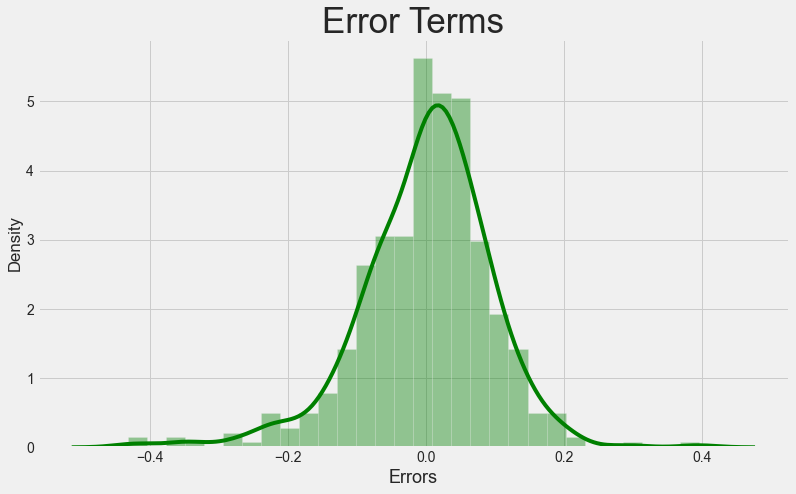

In [80]:
#Plotting the difference between actual and predicted values of y_train dataset.
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

plt.figure(figsize= [12,7])
sns.distplot((y_train - y_train_pred),color= 'green')
plt.title('Error Terms', fontsize = 35)
plt.xlabel('Errors', fontsize = 18)   
plt.show()

Here, we can see that the error terms are normally distributed and their mean is close to 0.

### Section - 4.8 Making Predictions on test dataset

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. Seventh model

##### Applying the scaling on the test data set

In [81]:
# Scaling the test dataset

df_test[varlist] = scaler.transform(df_test[varlist])

In [82]:
# checking the summary of test dataframe

df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow & Rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
# Now diving the test data set into y_test and X_test

y_test = df_test.pop('cnt')
X_test = df_test

In [84]:
# Adding the constant to the dataframe 

X_test_lm = sm.add_constant(X_test)

In [85]:
# Dropping the same no. of variables that are not present in training dataframe

X_test_lm = X_test_lm.drop(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'], axis =1)

In [86]:
# Dropping those variables that are insignificant or irrelevant

X_test_lm = X_test_lm.drop(['humidity', 'windspeed', 'summer','Jan','Dec','Nov'], axis=1)

In [87]:
# Checking the summary of our final test_data frame

X_test_lm.describe()

,const,year,holiday,temp,spring,winter,Jul,Sep,Cloudy,Light Snow & Rain
count,219.0,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,1.0,0.479452,0.036530,0.558941,0.255708,0.232877,0.105023,0.086758,0.319635,0.027397
std,0.0,0.500722,0.188034,0.233698,0.437258,0.423633,0.307285,0.282125,0.467403,0.163612
min,1.0,0.000000,0.000000,0.046591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.354650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.000000,0.558691,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,0.000000,0.759096,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.0,1.000000,1.000000,0.984424,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
# Making predictions using the 7th model

y_test_pred = lr.predict(X_test_lm)

In [89]:
# Checking the R2 squared of the test data set

round(r2_score(y_test,y_test_pred),2)

0.81

## Section - 5 Model Evaluation

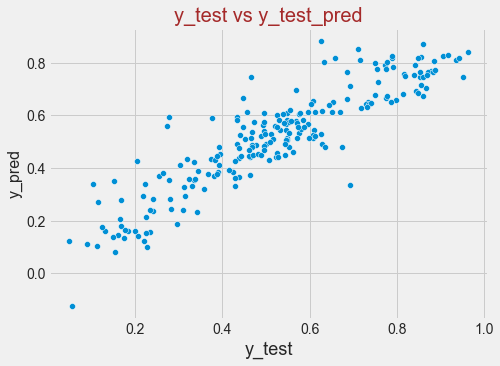

In [90]:
# Plotting the scatterplot between y_test and y_test_pred for understanding the spread

plt.figure(figsize= [7,5])
sns.scatterplot(x = y_test,y= y_test_pred)
plt.title('y_test vs y_test_pred', fontsize = 20, color = 'brown')
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()

In [91]:
# comparing the r2 squared values for both the train and test dataframe

r21 = round(r2_score(y_train, y_train_pred),2)
print(r21)
r22 = round(r2_score(y_test,y_test_pred),2)
print(r22)

0.82
0.81


Here, we can see that both the train and test r2 squared values are very close to each other. So we can say that our model is significant.

In [92]:
lr.params

const                0.193838
year                 0.233037
holiday             -0.101113
temp                 0.471172
spring              -0.110708
winter               0.055785
Jul                 -0.068771
Sep                  0.065793
Cloudy              -0.079572
Light Snow & Rain   -0.300245
dtype: float64

In [93]:
# Checking the parameters of our final model for creating the equation for our best fit line.

param = pd.DataFrame(lr.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,10))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
3,temp,0.471172
1,year,0.233037
0,const,0.193838
7,Sep,0.065793
5,winter,0.055785
6,Jul,-0.068771
8,Cloudy,-0.079572
2,holiday,-0.101113
4,spring,-0.110708


<b><font color='green'>We can see that the equation of our best fitted line is:</font></b>

<b>cnt = 0.1938 + 0.471172 X temp + 0.233037 X year + 0.065793 X Sep + 0.055785 X winter - 0.068771 X Jul - 0.079572 X Cloudy - 0.101113 X holiday - 0.110708 X spring - 0.300245 X Light Snow & Rain</b>

##### <b>All the positive coefficients like temp,year, Sep etc. indicate that an increase in these values will lead to an increase in the value of cnt.</b>


##### <b>All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.</b>


- Temp is the most significant with the largest coefficient.
- Followed by year.
- Bike rentals is more for the month of september
- The rentals reduce during holidays and in the month of July.
- The rentals also reduce on Cloudy weather_sit.

#### Above best fit line indicates that the bike rentals are highly affected by the temperature and season. So, company should focus on these factors.